<a href="https://colab.research.google.com/github/Devsthink/BBVA-DATA-DRIVEN/blob/main/BBVA_Hackaton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hackaton BBVA


# Modelo de prediccion de valorizacion de inmuebles

Librerias necesarias para creacion de modelo



*   Manejo de arreglos en diferentes dimensiones
*   Cargar y exportar datos
*   Redes Neuronales
*   Ubicaciones geograficas





# Obtención de datos

*   Carga de datos a variable local



In [ ]:
import pandas as pd
from geopy.geocoders import Nominatim
import tensorflow as tf
import numpy as np
import csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/BBVA_Hackaton/a.csv'

In [ ]:
df = pd.read_csv(path)
df.head(20)

,Fecha entrega del Informe,Tipo de via,Piso,Departamento,Provincia,Distrito,Numero de estacionamiento,Depositos,Latitud,Longitud,...,Posicion,Numero de frentes,Edad,Elevador,Estado de conservacion,Metodo Representado,Moneda principal para calculos,Area Terreno,Area Construccion,Valor comercial
0,28/04/2022,2,1,Lima,Lima,Magdalena del Mar,0,0,-12.120143,-77.023960,...,Exterior,2.0,3.0,1,Bueno,Comparacion de mercado (directo),USD,0.0,81.56,"120,708.80"
1,27/04/2022,6,4,Lima,Lima,San Juan de Lurigancho,1,0,-12.022509,-76.833715,...,Exterior,1.0,42.0,2,Regular,Costos o reposicion (directo),USD,410.0,0.00,"192,225.00"
2,27/04/2022,2,5,Lima,Lima,Santiago de Surco,1,0,-12.089686,-77.068454,...,Exterior,1.0,16.0,2,Bueno,Comparacion de mercado (directo),USD,0.0,90.13,"137,886.28"
3,27/04/2022,10,2,Lima,Lima,Pachacamac,0,1,-12.095758,-76.981323,...,Exterior,NaN,NaN,2,Bueno,Costos o reposicion (directo),USD,120.0,0.00,"44,400.00"
4,27/04/2022,1,3,Lima,Lima,San Isidro,0,0,-12.015309,-76.874213,...,Exterior,0.0,1.0,1,Muy bueno,Comparacion de mercado (directo),PEN,0.0,45.00,"111,600.00"
5,27/04/2022,2,2,Lima,Lima,La Victoria,0,0,-12.095764,-77.023360,...,Exterior,NaN,27.0,2,Bueno,Comparacion de mercado (directo),USD,0.0,26.72,"604,139.20"
6,27/04/2022,3,2,Lima,Lima,Santiago de Surco,1,0,-12.029741,-76.945582,...,Exterior,NaN,3.0,2,Bueno,Comparacion de mercado (directo),PEN,0.0,155.03,"262,095.12"
7,27/04/2022,1,2,Lima,Lima,Santiago de Surco,1,0,-11.899533,-77.057616,...,Interior,1.0,1.0,1,Muy bueno,Comparacion de mercado (directo),USD,0.0,177.87,"298,389.00"
8,26/04/2022,3,1,Lima,Lima,La Victoria,1,0,-12.076643,-77.050648,...,Exterior,1.0,2.0,2,Malo,Comparacion de mercado (directo),USD,0.0,88.12,"144,249.80"
9,26/04/2022,1,4,Lima,Lima,Ate,0,0,-5.185692,-80.654541,...,Exterior,1.0,0.0,1,Bueno,Comparacion de mercado (directo),USD,0.0,69.09,"102,267.12"


# *Descripción de datos*

*   Distinción de valores numericos y no numericos
*   Rangos entre cada variable




In [ ]:
#Valores descriptivos de dataset
df.describe()

,Tipo de via,Piso,Numero de estacionamiento,Depositos,Latitud,Longitud,Numero de frentes,Edad,Elevador,Area Terreno,Area Construccion
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,16.00000,18.000000,20.000000,20.000000,20.000000
mean,3.100000,2.800000,0.300000,0.050000,-11.527040,-77.272841,1.25000,14.500000,1.550000,51.765000,103.330500
std,3.210181,1.399248,0.470162,0.223607,1.735406,0.918707,0.68313,19.977193,0.604805,106.581273,75.481729
min,1.000000,1.000000,0.000000,0.000000,-12.136353,-80.654541,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,0.000000,-12.100001,-77.030632,1.00000,1.000000,1.000000,0.000000,63.080000
50%,2.000000,2.500000,0.000000,0.000000,-12.070663,-77.006111,1.00000,2.500000,2.000000,0.000000,89.125000
75%,3.000000,4.000000,1.000000,0.000000,-12.027933,-76.962508,1.25000,24.250000,2.000000,30.000000,142.395000
max,10.000000,5.000000,1.000000,1.000000,-5.185692,-76.833715,3.00000,56.000000,2.000000,410.000000,333.580000


In [ ]:
#Numero de registros y valores a tomar en cuenta
df.shape

(20, 21)

In [ ]:
df.dtypes

Fecha entrega del Informe          object
Tipo de via                         int64
Piso                                int64
Departamento                       object
Provincia                          object
Distrito                           object
Numero de estacionamiento           int64
Depositos                           int64
Latitud                           float64
Longitud                          float64
Categoria del bien                 object
Posicion                           object
Numero de frentes                 float64
Edad                              float64
Elevador                            int64
Estado de conservacion             object
Metodo Representado                object
Moneda principal para calculos     object
Area Terreno                      float64
Area Construccion                 float64
Valor comercial                    object
dtype: object

## Conteo de valores 
Numero de itereaciones por cada valor distinto en variables

In [ ]:
df['Tipo de via'].value_counts()

1     9
2     4
10    3
3     3
6     1
Name: Tipo de via, dtype: int64

In [ ]:
df['Piso'].value_counts()

2    6
1    4
4    4
5    3
3    3
Name: Piso, dtype: int64

In [ ]:
df['Departamento'].value_counts()

Lima           18
La Libertad     1
Piura           1
Name: Departamento, dtype: int64

In [ ]:
df['Estado de conservacion'].value_counts()

Bueno        12
Muy bueno     6
Regular       1
Malo          1
Name: Estado de conservacion, dtype: int64

In [ ]:
df['Provincia'].value_counts()

Lima        18
Trujillo     1
Piura        1
Name: Provincia, dtype: int64

In [ ]:
df['Categoria del bien'].value_counts()

Departamento            13
Vivienda Unifamiliar     4
Local Comercial          2
Terreno Urbano           1
Name: Categoria del bien, dtype: int64

In [ ]:
df['Metodo Representado'].value_counts()

Comparacion de mercado (directo)    15
Costos o reposicion (directo)        5
Name: Metodo Representado, dtype: int64

#Direcciones especificas

Se pretende utilizar la localización para agregar peso y valor a la funcion de calculo

In [ ]:
directions = []
geolocalizador = Nominatim();
#Se recorren todos los valores para obtener su direccion
for i in range(len(df)):
    direction = geolocalizador.reverse(str(df.at[i,"Latitud"]) + ',' + str(df.at[i,"Longitud"]))
    directions.append(direction) #Se agrega a la lista

    

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [ ]:
#Se muestra la lista de direcciones
arr_directions = np.array(directions)
print(arr_directions)

[['Alimentos Orgánicos, Avenida Ricardo Palma, Miraflores, Lima, Lima Metropolitana, Lima, 15047, Perú'
  (-12.1200224, -77.02411169999999)]
 ['Cruz de Mayo, Huaycán, Ate, Lima, Lima Metropolitana, Lima, 15483, Perú'
  (-12.022988868528829, -76.83358761224656)]
 ['Institución Educativa Miguel Grau, 1025, Jirón Libertad, Magdalena, Magdalena del Mar, Lima, Lima Metropolitana, Lima, 15086, Perú'
  (-12.089316, -77.06880828321442)]
 ['Jirón 27, San Borja, Lima, Lima Metropolitana, Lima, 15023, Perú'
  (-12.095700479837816, -76.98133061268804)]
 ['San Juan, Santa Clara, Ate, Lima, Lima Metropolitana, Lima, 15487, Perú'
  (-12.015178275510912, -76.87424669152152)]
 ['File Security, 227, Calle German Schreiber, Centro financiero de San Isidro, San Isidro, Lima, Lima Metropolitana, Lima, 15000, Perú'
  (-12.0958146, -77.0233109)]
 ['Santa Anita, Lima, Lima Metropolitana, Lima, 15009, Perú'
  (-12.029485310302201, -76.94566781602553)]
 ['Comas, Lima, Lima Metropolitana, Lima, 15316, Perú'
  (-

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


#Rango de datos

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f005379f4d0>,
      dtype=object)

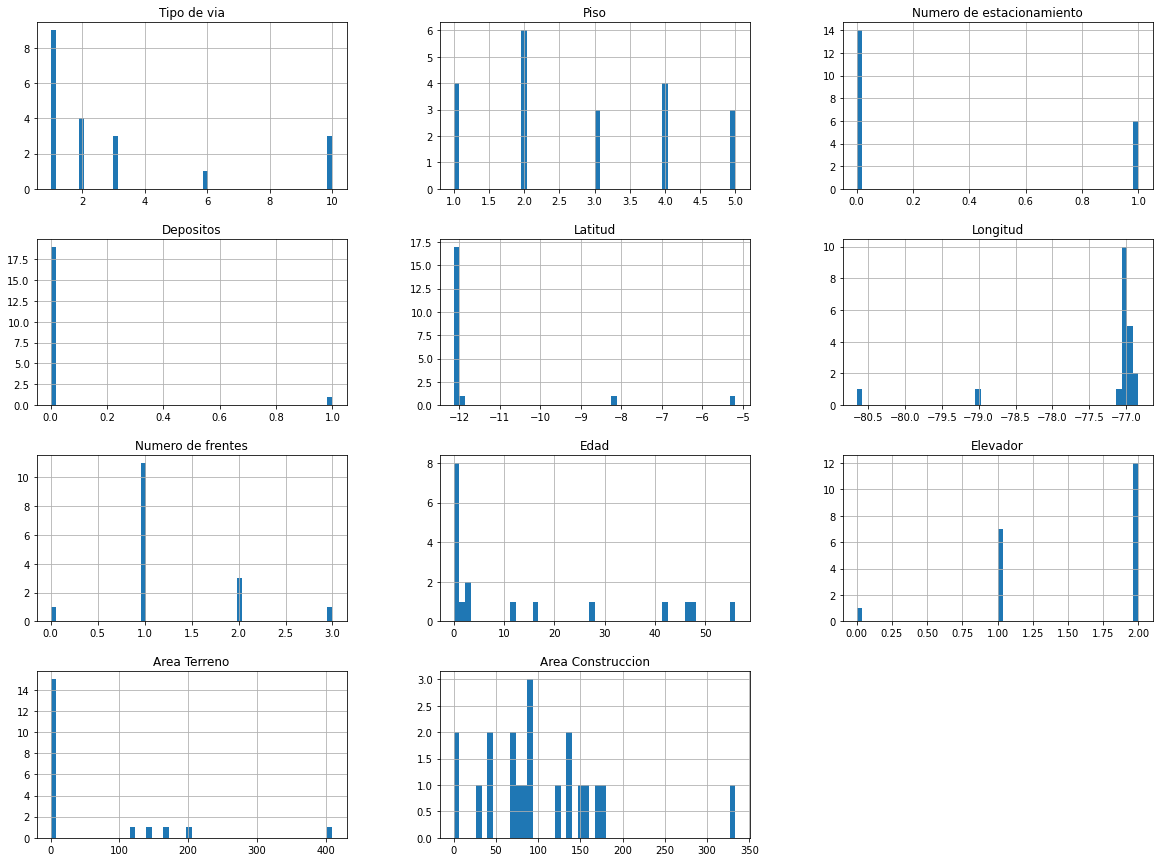

In [ ]:
df.hist(bins=50, figsize=(20,15))

# Funciones que calculan cosas


In [ ]:
#array of streats
street = ["Calle 1", "Calle 2", "Calle 3", "Calle 4", "Calle 5", "Calle 6", "Calle 7"]

#array of departments
departments = ["Departamento 1", "Departamento 2", "Departamento 3", "Departamento 4", "Departamento 5"]


#array of districts
districts = ["San Isidro", "La Victoria", "Santiago de Surco", "La Victoria", "Ate", "Breña", "Pueblo Libre", "Veintiseis de Octubre"]

#array of floars
floars = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"] 


#function to select the street
def selectStreet():
    print("Selecciona la calle")
    for i in range(len(street)):
        print(i+1, street[i])
    streetSelected = int(input("Selecciona una calle: "))
    return street[streetSelected-1]



#function to calculate the price of the house
def calculatePrice(street, department, district, floar):
    price = 0
    if street == "Calle 1":
        price += 1000
    elif street == "Calle 2":
        price += 2000
    elif street == "Calle 3":
        price += 3000
    elif street == "Calle 4":
        price += 4000
    elif street == "Calle 5":
        price += 5000
    elif street == "Calle 6":
        price += 6000
    elif street == "Calle 7":
        price += 7000

    if department == "Departamento 1":
        price += 1000
    elif department == "Departamento 2":
        price += 2000
    elif department == "Departamento 3":
        price += 3000
    elif department == "Departamento 4":
        price += 4000
    elif department == "Departamento 5":
        price += 5000

    if district == "San Isidro":
        price += 1000
    elif district == "La Victoria":
        price += 2000
    elif district == "Santiago de Surco":
        price += 3000
    elif district == "Ate":
        price += 4000
    elif district == "Breña":
        price += 5000
    elif district == "Pueblo Libre":
        price += 6000
    elif district == "Veintiseis de Octubre":
        price += 7000

    if floar == "1":
        price += 1000
    elif floar == "2":
        price += 2000
    elif floar == "3":
        price += 3000
    elif floar == "4":
        price += 4000
    elif floar == "5":
        price += 5000
    elif floar == "6":
        price += 6000
    elif floar == "7":
        price += 7000
    elif floar == "8":
        price += 8000
    elif floar == "9":
        price += 9000
    elif floar == "10":
        price += 10000

    return price

In [ ]:
selectStreet()

Selecciona la calle
1 Calle 1
2 Calle 2
3 Calle 3
4 Calle 4
5 Calle 5
6 Calle 6
7 Calle 7
Selecciona una calle: 7


'Calle 7'